**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Francisco Javier Salgado Acevedo
*   MATRÍCULA: A01796032


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/Actividad4EDA"
os.chdir(DIR)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

---



1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


 2. Determina el porcentaje de valores faltantes por columna.

In [9]:
# Imprimir el porcentaje de valores faltantes por columna, multiplica por 100 para convertir la proporción en un porcentaje
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [11]:
# Utilizando describe() para obtener las estadísticas descriptivas básica: media, mediana (50%), min, max, y cuartiles (25% y 75%)
statistics = df.describe()
print("Estadísticas Descriptivas Básicas:\n", statistics)


Estadísticas Descriptivas Básicas:
          person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.0

In [17]:
# Calculando la asimetría
numerical_data = df.select_dtypes(include=['float64', 'int64'])
sk = numerical_data.skew()
print("\nAsimetría:\n", sk)



Asimetría:
 person_age                     2.581393
person_income                 32.865349
person_emp_length              2.614455
loan_amnt                      1.192477
loan_int_rate                  0.208550
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64


In [18]:
# Calculando la curtosis
kurt = numerical_data.kurtosis()
print("\nCurtosis:\n", kurt)


Curtosis:
 person_age                      18.560825
person_income                 2693.272776
person_emp_length               43.722338
loan_amnt                        1.423565
loan_int_rate                   -0.671609
loan_status                     -0.137088
loan_percent_income              1.223687
cb_person_cred_hist_length       3.716194
dtype: float64


In [19]:
# Clasifica las variables person_age y loan_in_rate según los valores observados de asimetría y curtosis
edad_sk_kurt = (df['person_age'].skew(), df['person_age'].kurtosis())
val_sk_kurt = (df['loan_int_rate'].skew(), df['loan_int_rate'].kurtosis())
print("\nClasificación de 'person_age' - Asimetría: {}, Curtosis: {}".format(edad_sk_kurt[0], edad_sk_kurt[1]))
print("Clasificación de 'loan_int_rate' - Asimetría: {}, Curtosis: {}".format(val_sk_kurt[0], val_sk_kurt[1]))


Clasificación de 'person_age' - Asimetría: 2.5813925261849846, Curtosis: 18.560824765312866
Clasificación de 'loan_int_rate' - Asimetría: 0.2085503016908977, Curtosis: -0.6716091079813706


4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

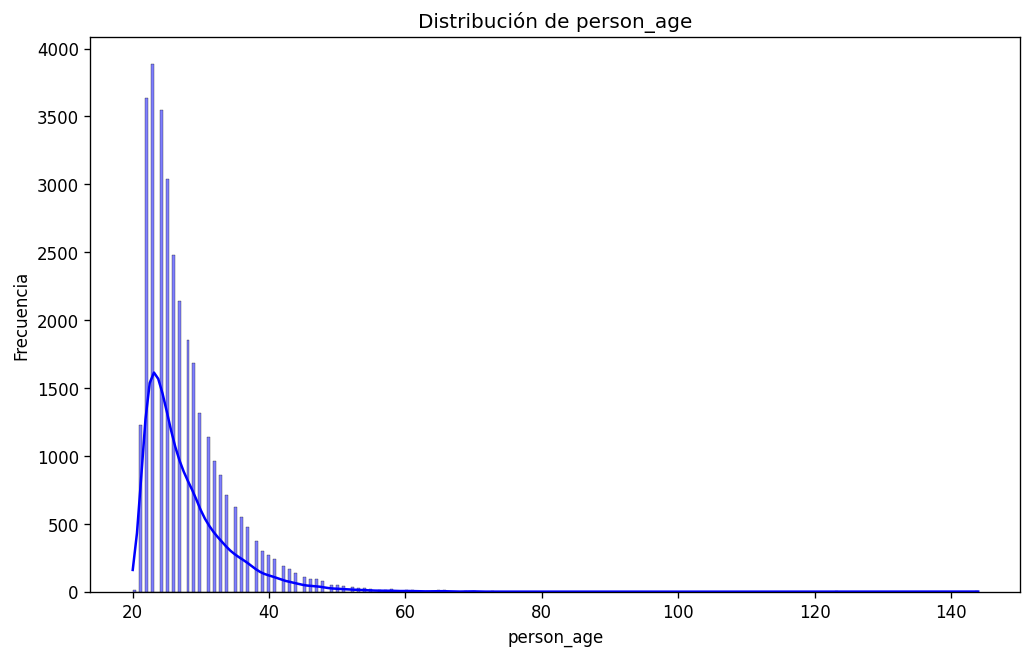

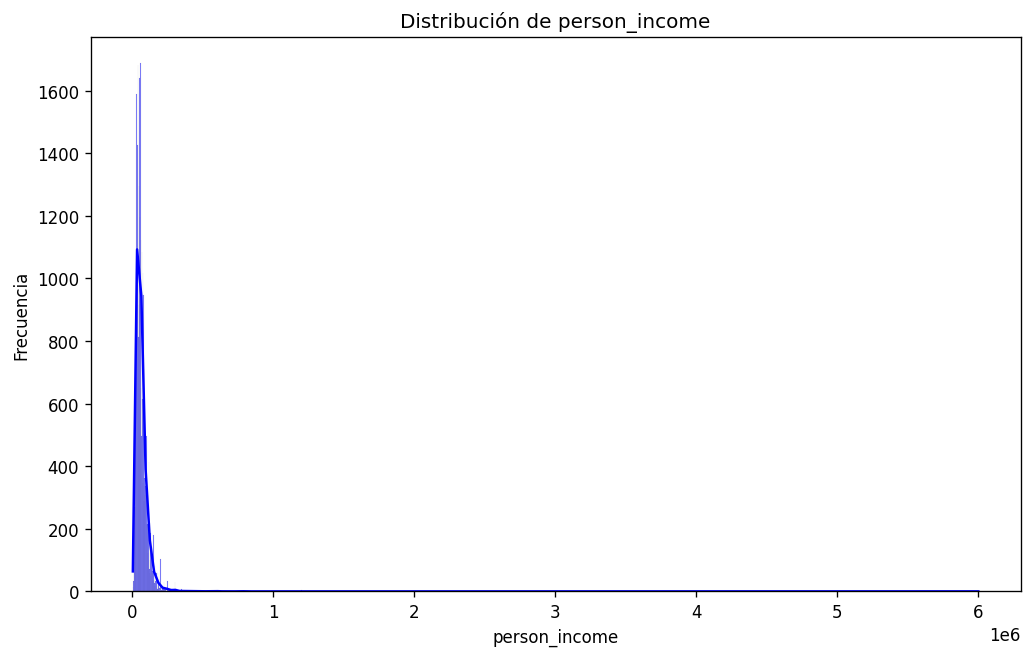

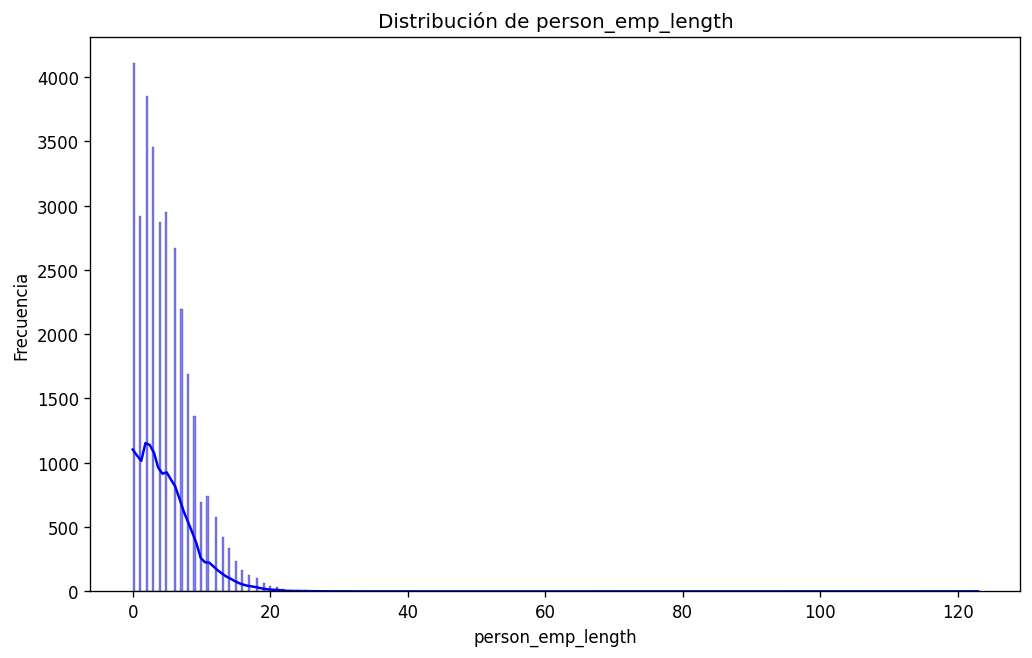

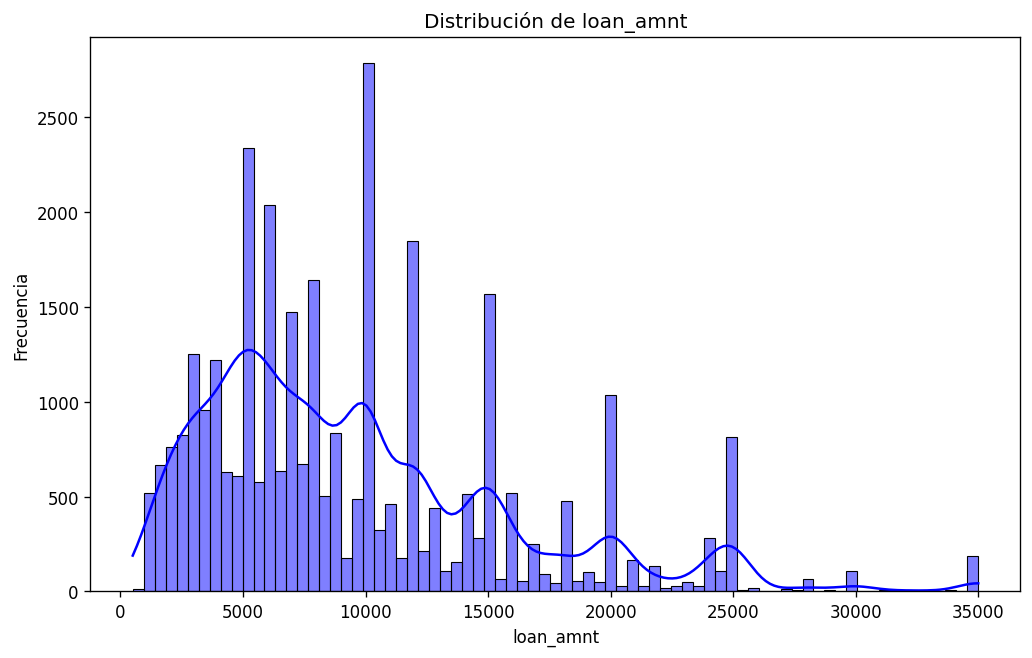

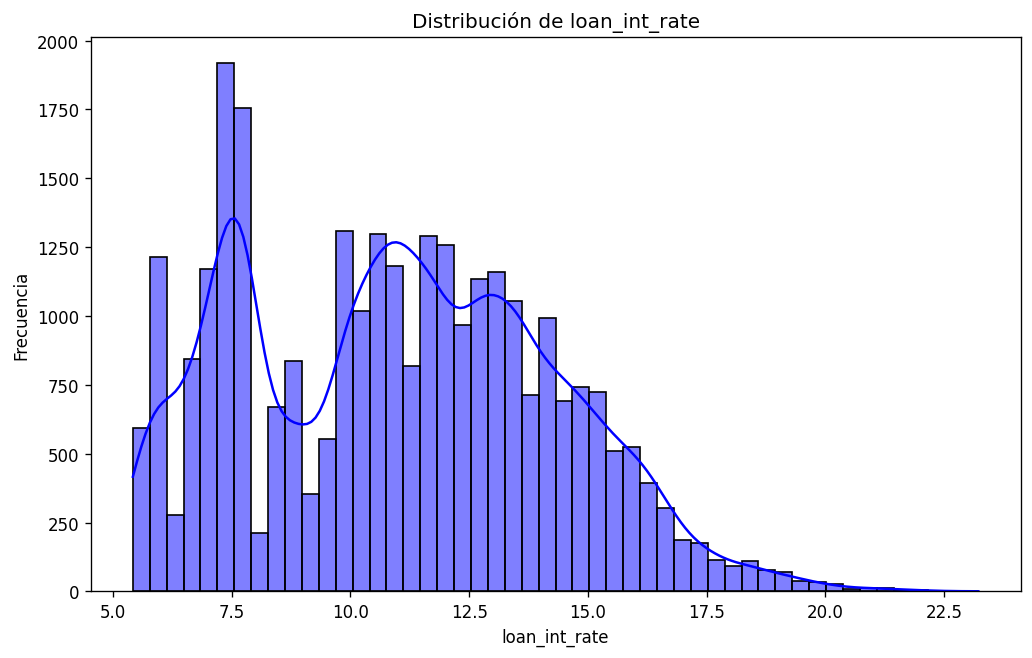

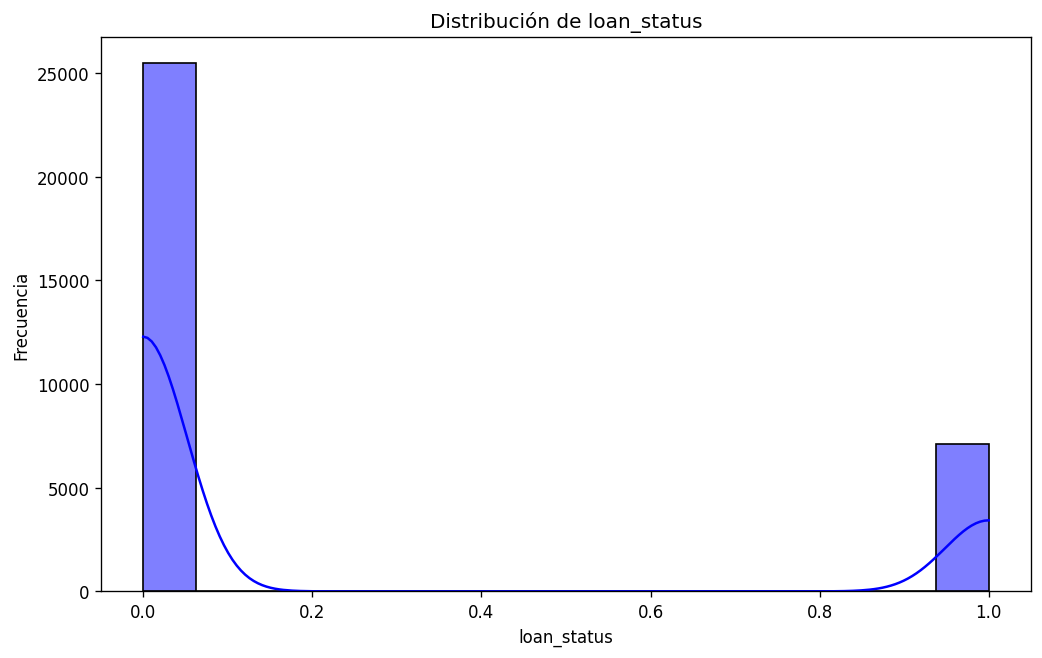

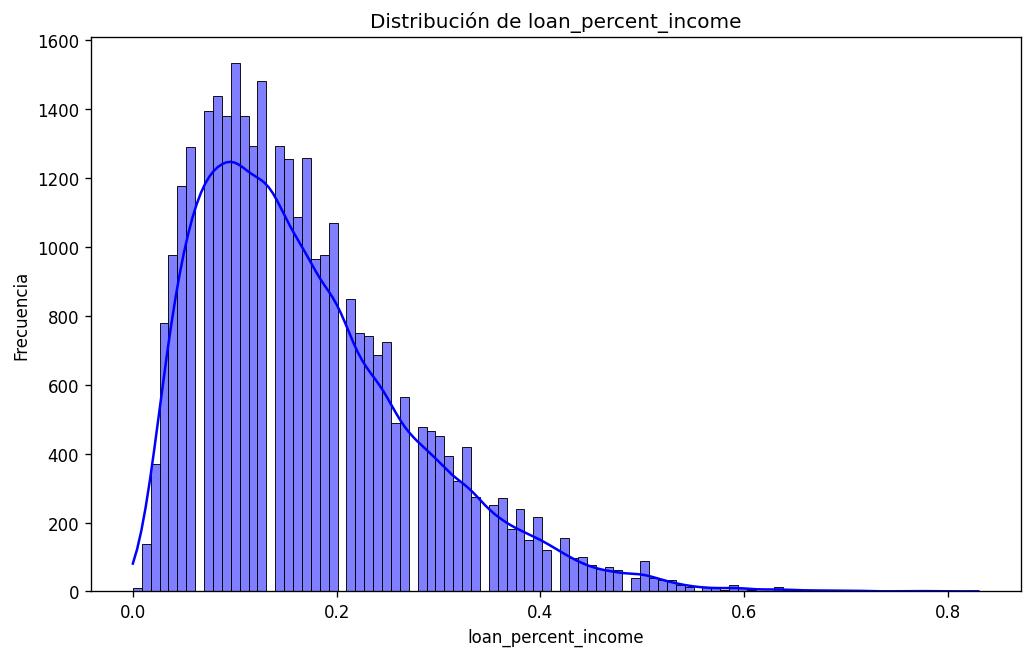

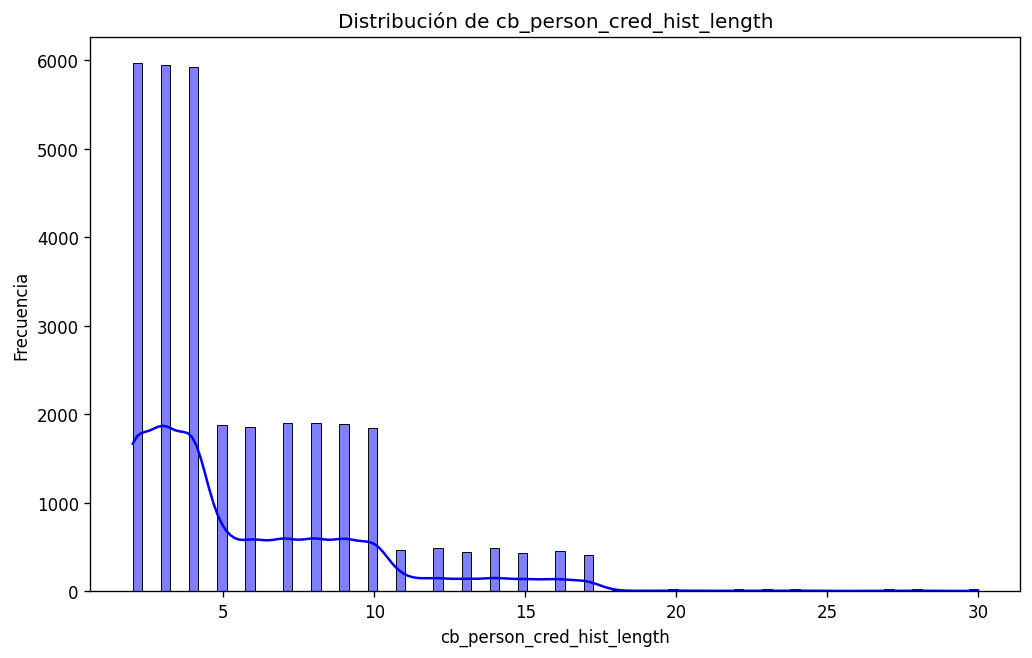

In [20]:
# Visualización
plt.rcParams.update({'figure.figsize': (10,6), 'figure.dpi': 120})

# Histogramas y gráficos
for column in numerical_data.columns:
    plt.figure()
    sns.histplot(numerical_data[column], kde=True, color='blue')
    plt.title('Distribución de ' + column)
    plt.xlabel(column)  # eje X
    plt.ylabel('Frecuencia')  # eje Y
    plt.show()

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

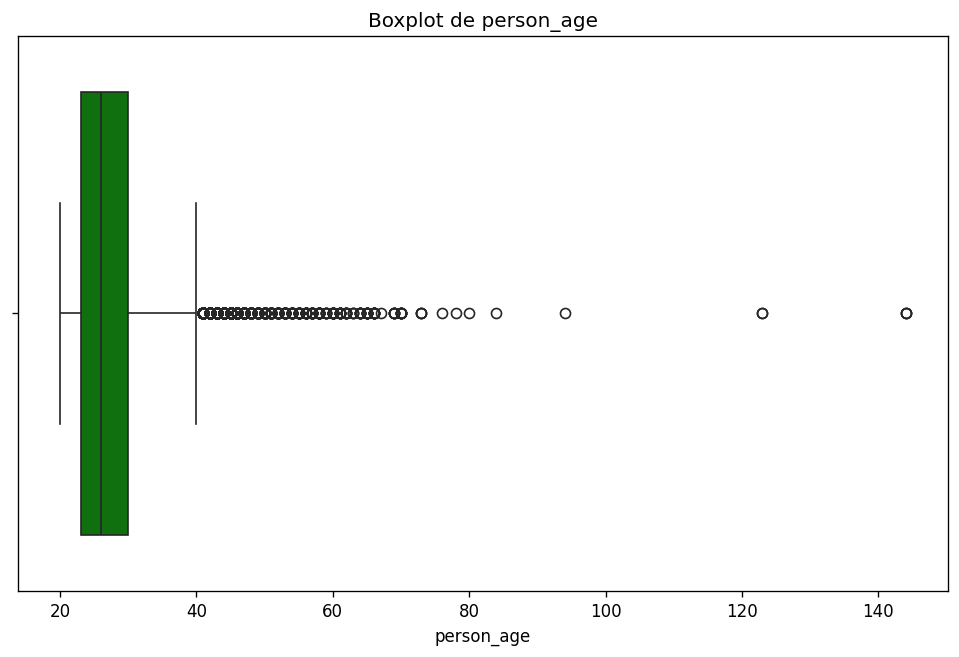

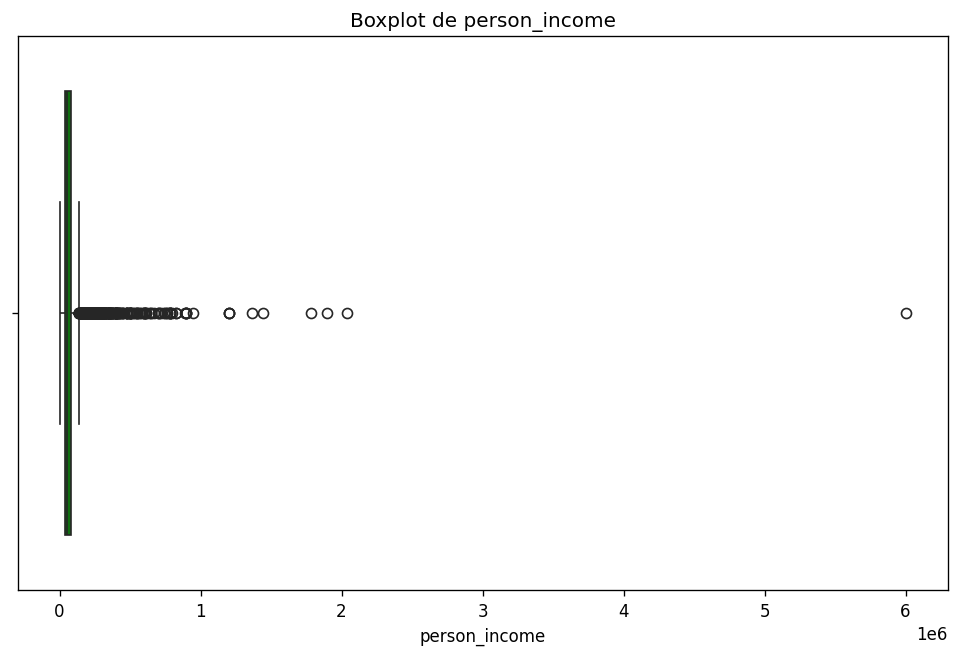

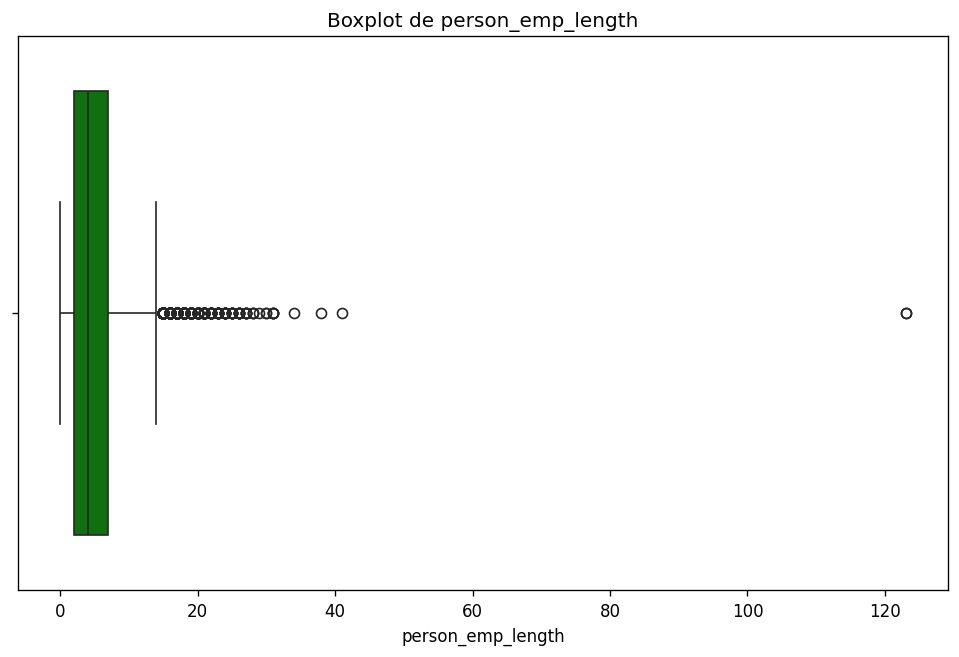

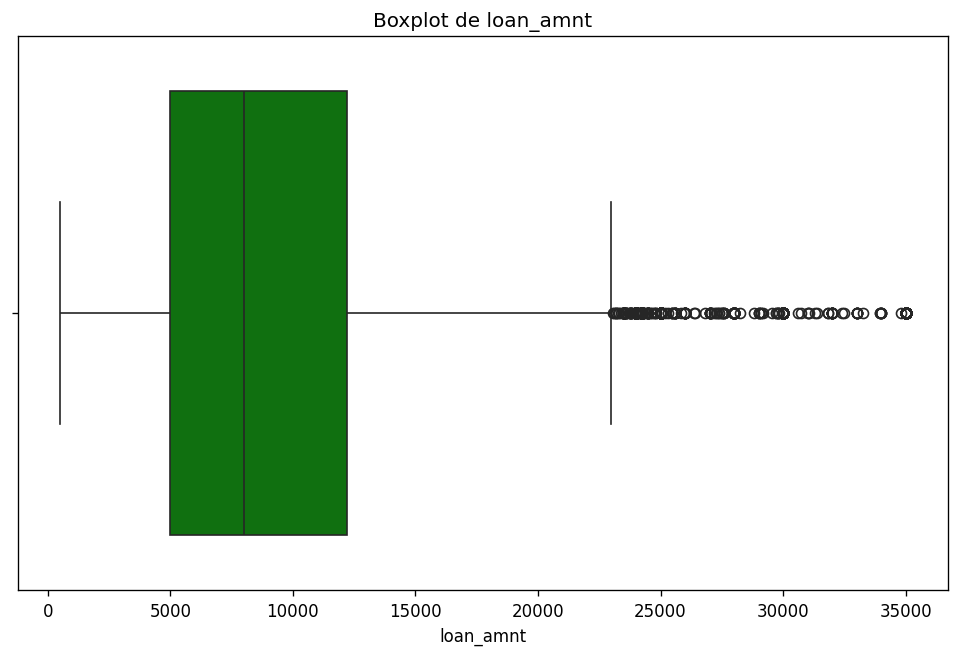

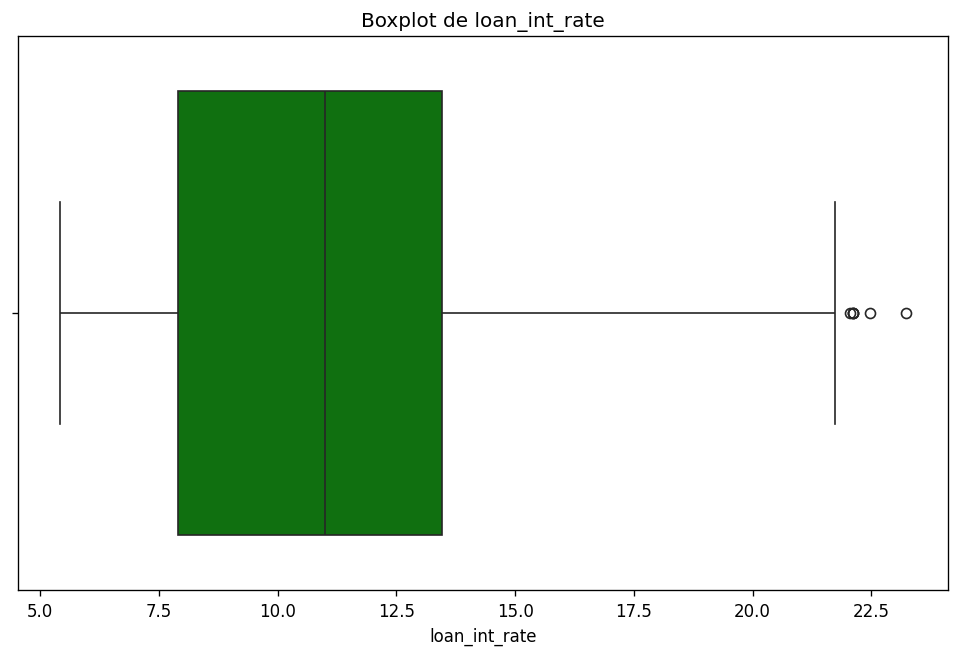

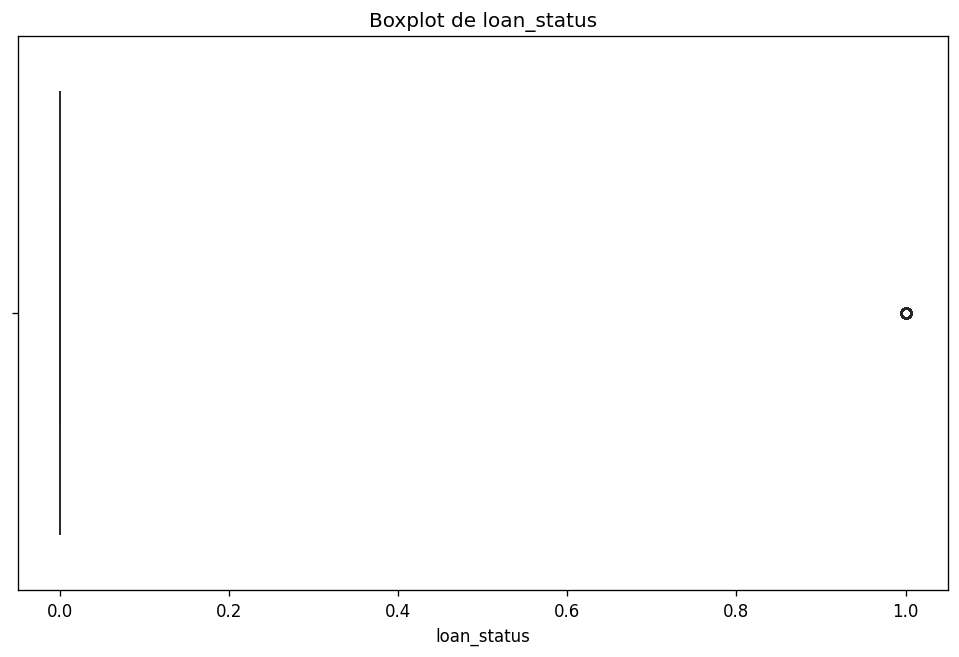

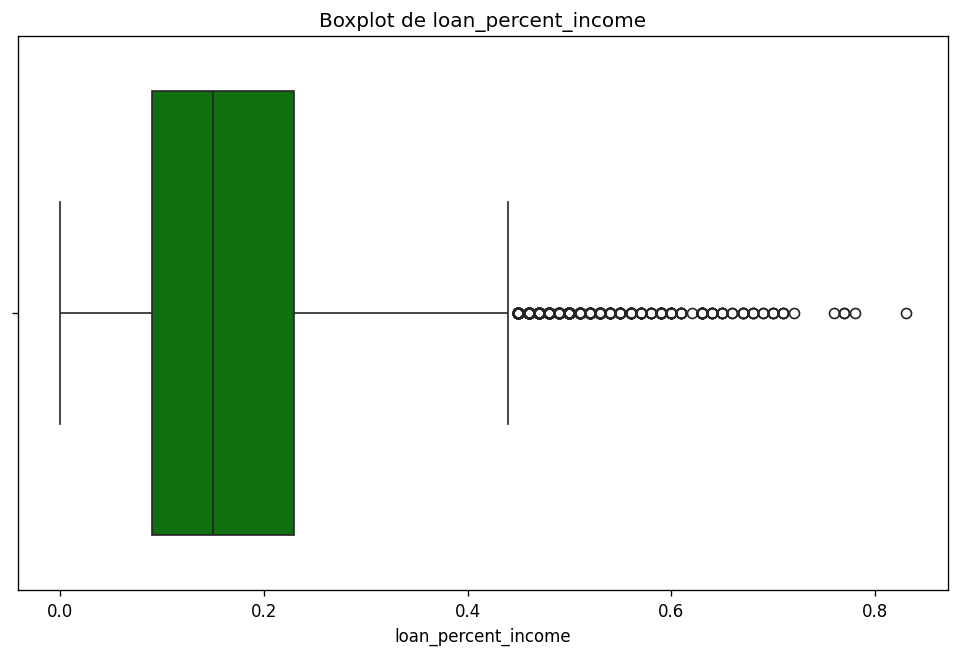

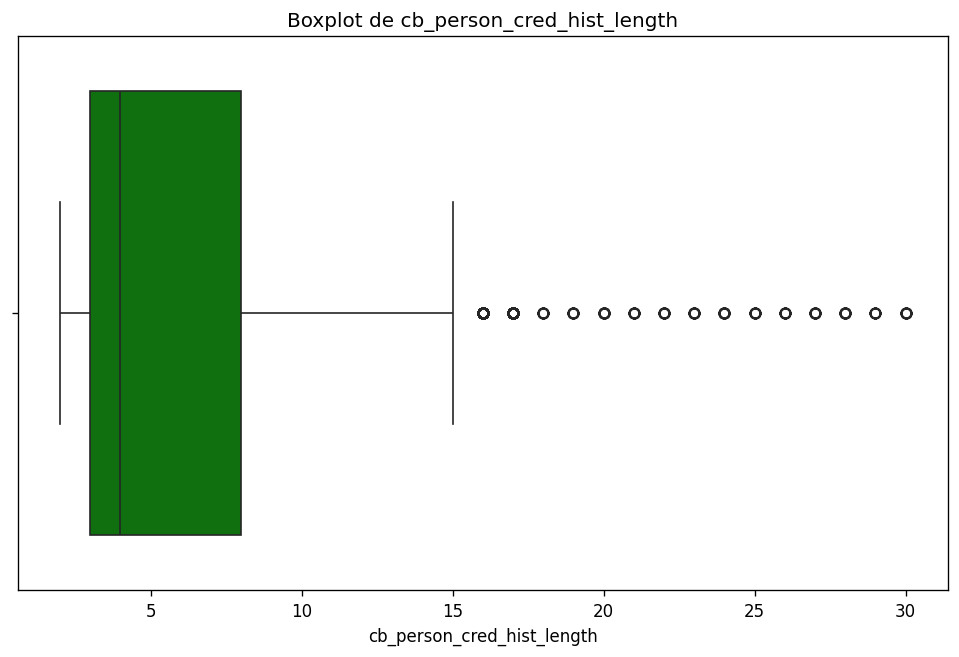

In [21]:
# Visualización
plt.rcParams.update({'figure.figsize': (10,6), 'figure.dpi': 120})

# Histogramas y gráficos
for column in numerical_data.columns:
    plt.figure()
    sns.boxplot(x=numerical_data[column], color='green')
    plt.title('Boxplot de ' + column)
    plt.xlabel(column)  # eje X
    plt.show()

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [22]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [23]:
# Descripción general
descripcion = df.describe(include='object')
print("Descripción General de Variables de Texto:\n", descripcion)

Descripción General de Variables de Texto:
        person_home_ownership loan_intent loan_grade cb_person_default_on_file
count                  32581       32581      32581                     32581
unique                     4           6          7                         2
top                     RENT   EDUCATION          A                         N
freq                   16446        6453      10777                     26836


In [27]:
# Mostrar la moda, cardinalidad y recuentos únicos
texto_columna = df.select_dtypes(include='object').columns
for columna in texto_columna:
    print(f"\nEstadísticas para la columna: {columna}")
    # Moda
    moda = df[columna].mode().values[0]
    print("Moda:", moda)
    # Cardinalidad
    cardinalidad = df[columna].nunique()
    print("Cardinalidad (valores únicos):", cardinalidad)
    # Recuentos únicos
    recuento = df[columna].value_counts()
    print("Recuentos de cada categoría:\n", recuento)



Estadísticas para la columna: person_home_ownership
Moda: RENT
Cardinalidad (valores únicos): 4
Recuentos de cada categoría:
 person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

Estadísticas para la columna: loan_intent
Moda: EDUCATION
Cardinalidad (valores únicos): 6
Recuentos de cada categoría:
 loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

Estadísticas para la columna: loan_grade
Moda: A
Cardinalidad (valores únicos): 7
Recuentos de cada categoría:
 loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

Estadísticas para la columna: cb_person_default_on_file
Moda: N
Cardinalidad (valores únicos): 2
Recuentos de cada categoría:
 cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64


7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

<ipython-input-28-5bd536917c55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=df, palette='Set2')


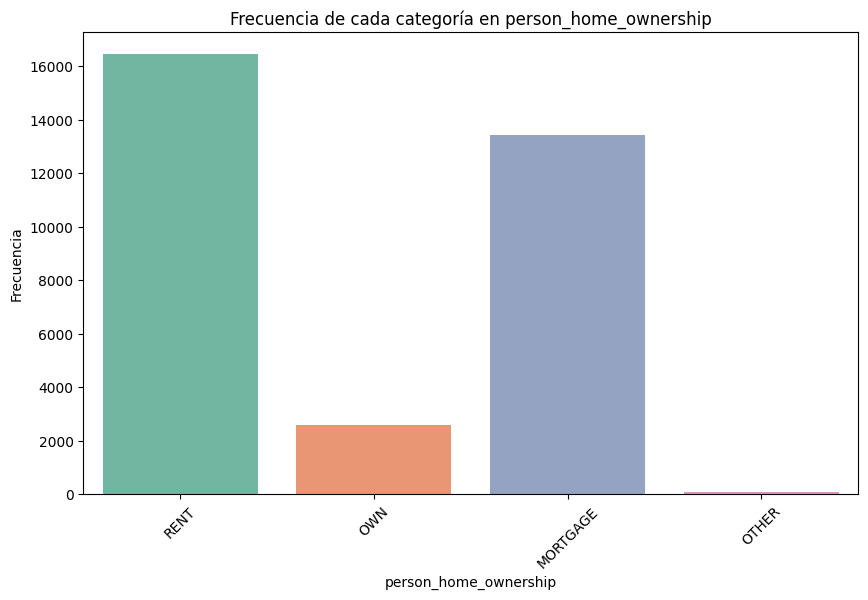

<ipython-input-28-5bd536917c55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=df, palette='Set2')


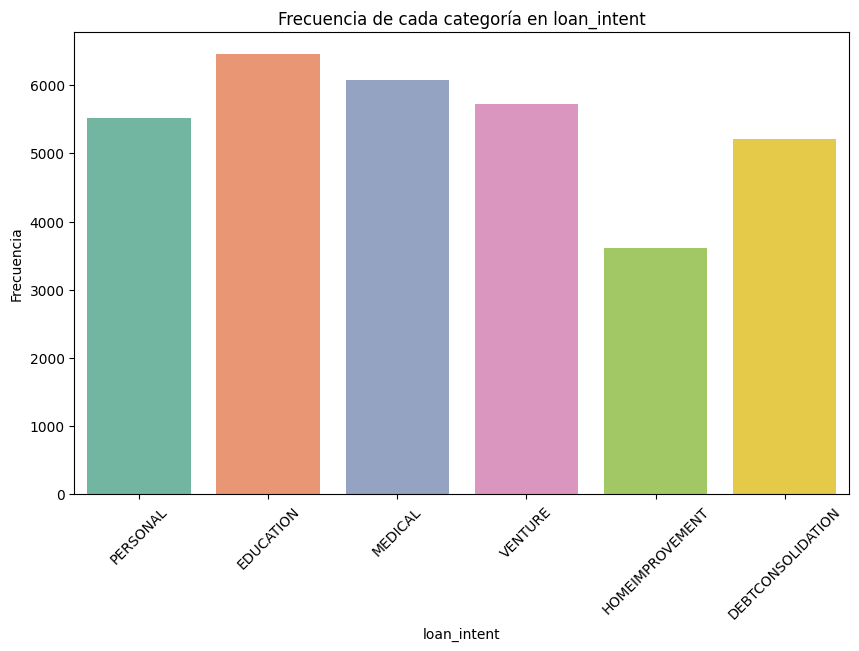

<ipython-input-28-5bd536917c55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=df, palette='Set2')


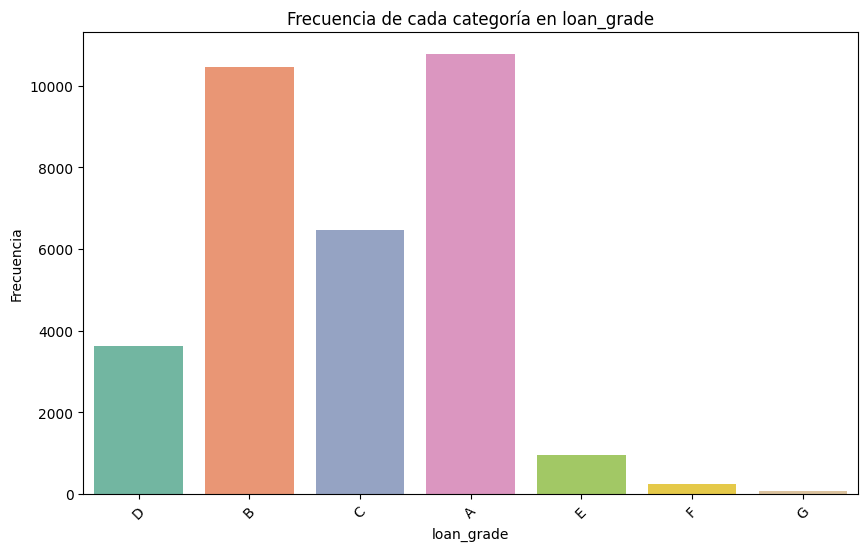

<ipython-input-28-5bd536917c55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=df, palette='Set2')


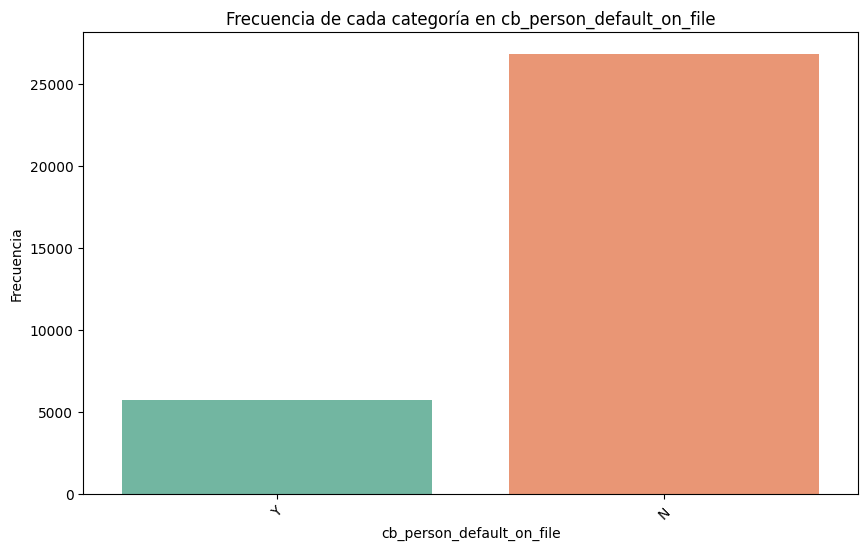

In [28]:
# Visualización
plt.rcParams.update({'figure.figsize': (10,6), 'figure.dpi': 100})

# Histogramas y gráficos
for columna in texto_columna:
    plt.figure()
    sns.countplot(x=columna, data=df, palette='Set2')
    plt.title(f'Frecuencia de cada categoría en {columna}')
    plt.ylabel('Frecuencia')  # eje Y
    plt.xticks(rotation=45)  # Rotar eje X
    plt.show()

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

Interpretacion:

Lo que intentamos ver es si hay una diferencia clara en la proporción del ingreso que se destina al préstamo entre aquellos que han incumplido y los que no. Estamos buscando si las personas que destinan un porcentaje mayor de su ingreso a los préstamos tienden a incumplir más que aquellos que destinan un porcentaje menor.

Al obervar los box plots para los clientes en estado de incumplimiento (loan_status = 1) muestran valores más altos de loan_percent_income, eso sugiere que las personas que incumplen sus préstamos generalmente tienen una mayor carga de deuda en relación con sus ingresos.

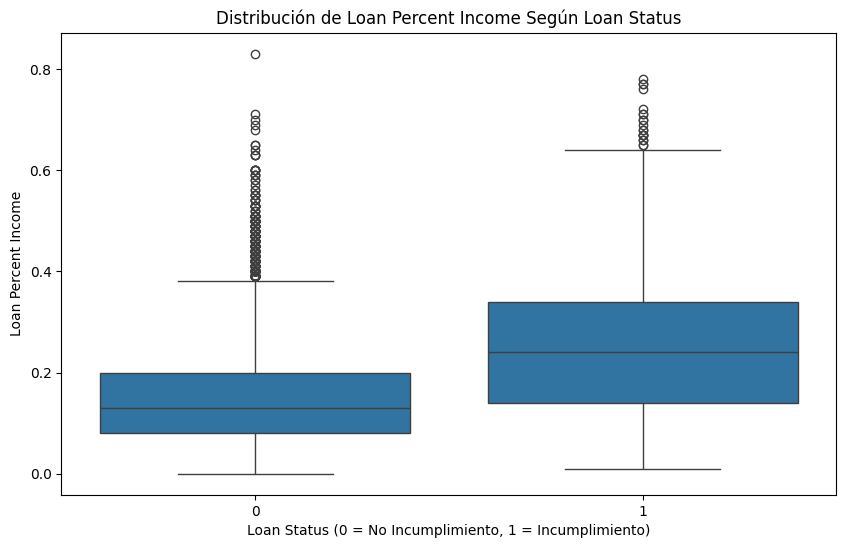

In [29]:
# Visualizacion y box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_percent_income', data=df)

# Titulos
plt.title('Distribución de Loan Percent Income Según Loan Status')
plt.xlabel('Loan Status (0 = No Incumplimiento, 1 = Incumplimiento)')
plt.ylabel('Loan Percent Income')
plt.show()


 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

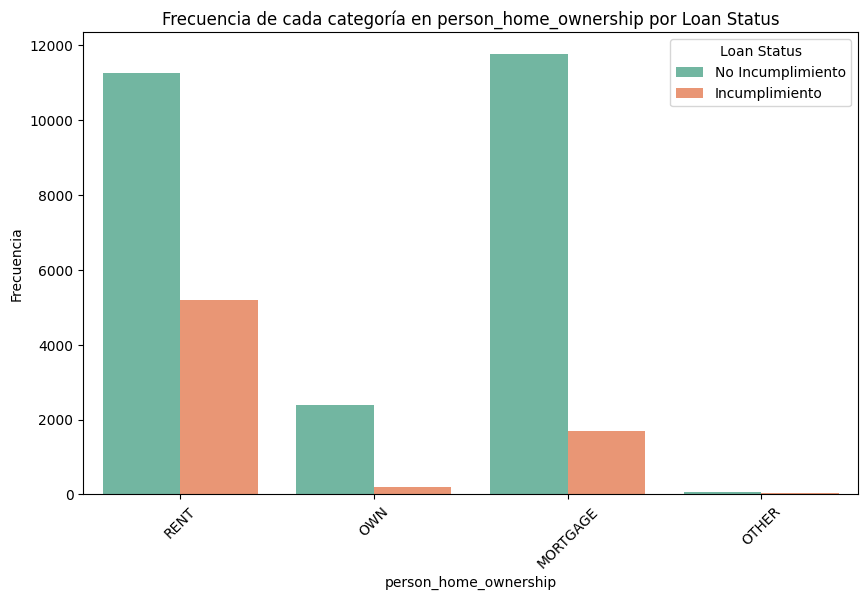

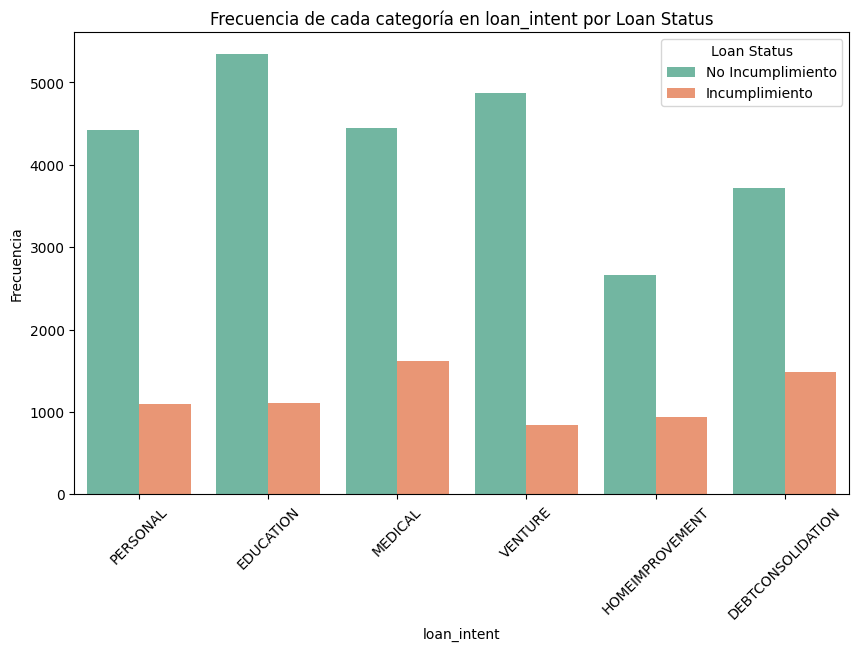

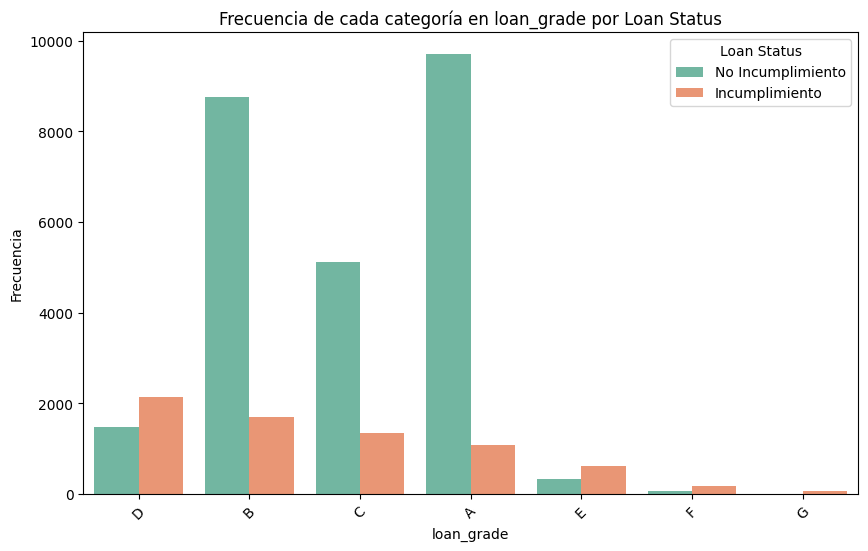

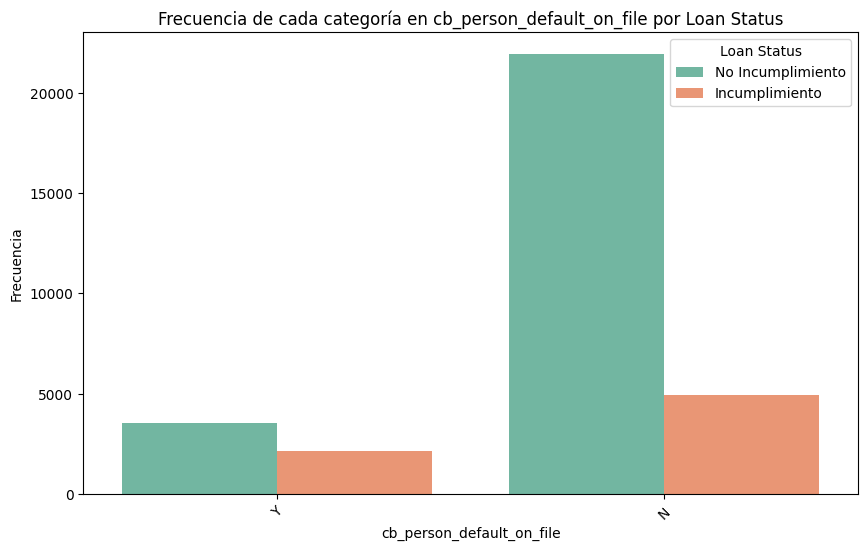

In [31]:
# Histogramas y graficos
for columna in texto_columna:
    plt.figure()
    sns.countplot(x=columna, hue='loan_status', data=df, palette='Set2')  # Gráfico con hue
    plt.title(f'Frecuencia de cada categoría en {columna} por Loan Status')
    plt.ylabel('Frecuencia')  # eje Y
    plt.xlabel(columna)  # eje X
    plt.xticks(rotation=45)  # Rota eje X
    plt.legend(title='Loan Status', labels=['No Incumplimiento', 'Incumplimiento'])
    plt.show()

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

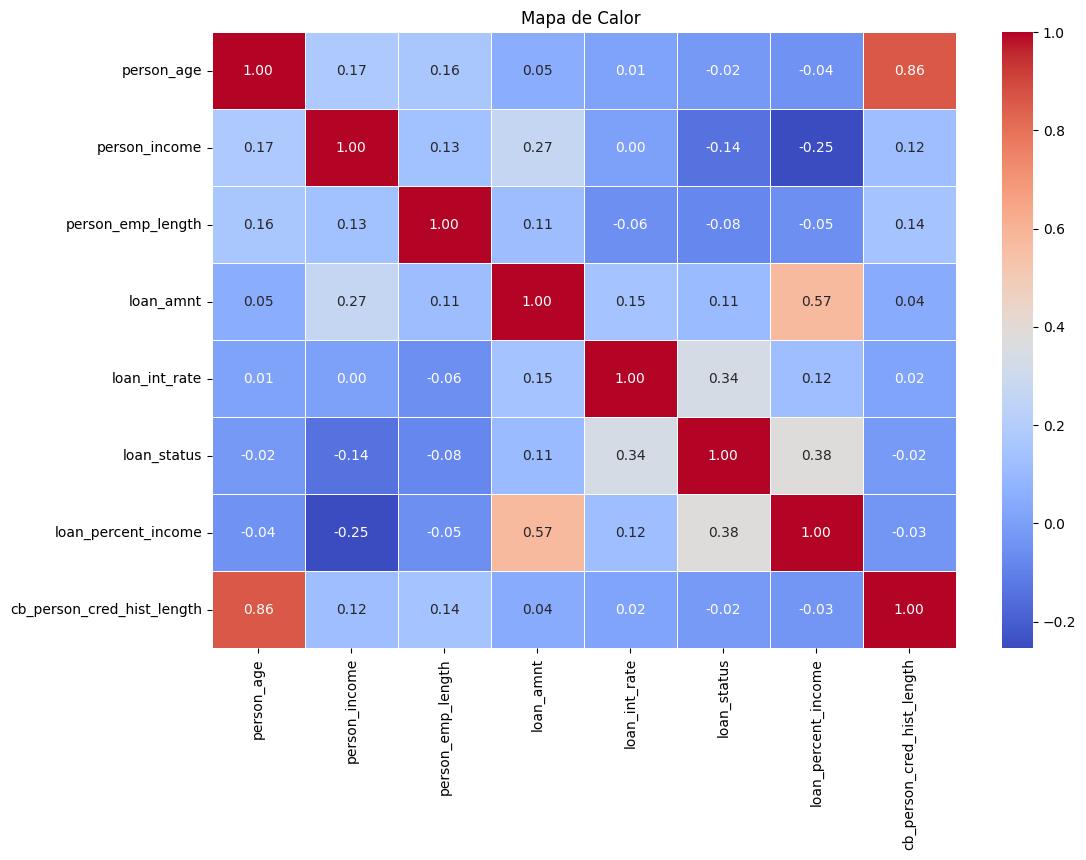

In [33]:
# Crear matriz de correlación
matriz = numerical_data.corr()

# Mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(matriz, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Mapa de Calor ')
plt.show()